In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from scipy import stats
import numpy as np

## TASK 0:
data = pd.read_csv('iris_clusters.csv', delimiter=";")

In [137]:
## TASK 2:
# 1. A min-max rescaling
data[['pl','pw','sl','sw']] = MinMaxScaler((0, 1)).fit_transform(data[['pl','pw','sl','sw']])
# data[['pl','pw','sl','sw']] = normalize(data[['pl','pw','sl','sw']])


# 2. Detect Outliers
sl_z = stats.zscore(data['sl'])
#print(np.sort(stats.zscore(data['sl'])))

# 3. Filter out the identified outliers
data = data[np.abs(sl_z) < 2]

dict_keys([0, 1, 2])
dict_values([96, 106, 97])
[[0.04019154 0.296875   0.22010281 0.50291667]
 [0.02778805 0.57293179 0.03546925 0.08226415]
 [0.05107473 0.40642347 0.2926764  0.79381443]]


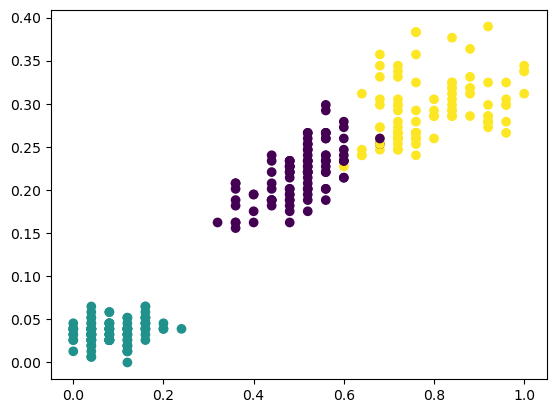

In [132]:
## TASK 1:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data[['pl','pw','sl','sw']])

print(Counter(kmeans.labels_).keys())
print(Counter(kmeans.labels_).values())
print(kmeans.cluster_centers_)

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()


In [119]:
## TASK 3:
best_k = -1
best_davies_bouldin_score = 9999999
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data[['pl','pw','sl','sw']])
    score = davies_bouldin_score(data[['pl','pw','sl','sw']], kmeans.labels_)
    if score < best_davies_bouldin_score:
        best_davies_bouldin_score = score
        best_k = k
print(f"KMeans: best david bowie score: {best_davies_bouldin_score}, k: {best_k}")

KMeans: best david bowie score: 0.5258946353247916, k: 2


Agglomaerative: best david bowie score: 0.6401017156394893, k: 6
Agglomaerative: Records, dict_values([118, 75, 75, 27, 3, 1])


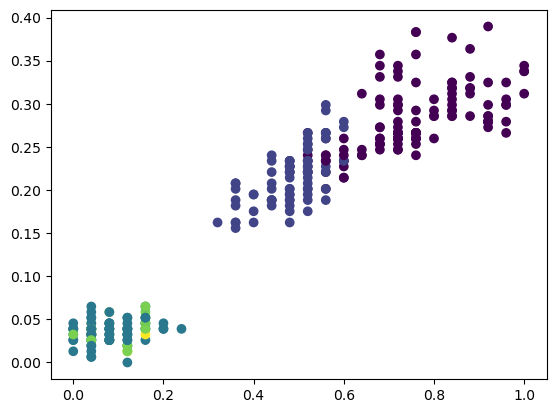

In [128]:
## TASK 4:
best_k = -1
best_davies_bouldin_score = 9999999
best_labels = []
for k in range(2,11):
    clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')
    clustering = clustering.fit(data[['pl','pw','sl','sw']])
    score = davies_bouldin_score(data[['pl','pw','sl','sw']], clustering.labels_)
    if score < best_davies_bouldin_score:
        best_davies_bouldin_score = score
        best_k = k
        best_labels = clustering.labels_

print(f"Agglomaerative: best david bowie score: {best_davies_bouldin_score}, k: {best_k}")
print(f"Agglomaerative: Records, {Counter(best_labels).values()}")

plt.scatter(data["sw"], data["sl"], c=best_labels, cmap='viridis')
plt.show()

In [135]:
## TASK 5:
clustering = DBSCAN(eps=1, min_samples=5).fit(data[['pl','pw','sl','sw']])
# 1. How many clusters does DB-SCAN find using eps=1, min_samples=5?
print(f"Clusters found: {len(Counter(clustering.labels_).keys())}")
# 2. Leaving min_samples unchanged (5), can you manually find a value for epsilon
# leading to two clusters (plus noise)?
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k    -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data[['pl','pw','sl','sw']], 5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

Clusters found: 1
